In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('pastel')

from glob import glob

from dataProcessingScript.resistanceAnalyzer.datahandler import DataHandler

from tqdm import tqdm

In [2]:
dir = 'data'
out_dir = 'R_on_(0,0,2,2)'
cell = '(device,0,0,-1,-1,2,2)'
files = [
    (10, '220228161659_form_0_5_1_10uA', '2202281619_reset_0_-4_1_5mA'),
    (15, '2202281651_set_0_5_1_15uA', '2202281654_reset_0_-5_1_8mA'),
    (20, '2202281626_set_0_5_1_20uA', '2202281629_reset_0_-4_1_5mA'),
    (25, '2202281634_set_0_5_1_25uA', '2202281636_reset_0_-5_1_8mA'),
    (30, '2202281637_set_0_5_1_30uA', '2202281638_reset_0_-5_1_8mA'),
    (35, '2202281640_set_0_5_1_35uA', '2202281641_reset_0_-5_1_8mA'),
    (40, '220228164500_set_0_5_1_40uA', '220228164554_reset_0_-5_1_8mA')
]

In [9]:
df = pd.DataFrame(columns=['Icc', 'V_set', 'R_on', 'R2'])

df_list = []

for icc, setfile, resetfile in tqdm(files):
    dhs = DataHandler(f'{dir}/{cell}_{setfile}.csv', linear_thresh=1e-2)
    dhr = DataHandler(f'{dir}/{cell}_{resetfile}.csv', linear_thresh=1e-2)

    Vset = dhs.set_voltage
    r_on = dhr.resistance
    r2 = None if r_on is None else dhr.r2

    df = df.append({'Icc': icc, 'V_set': Vset, 'R_on': r_on, 'R2': r2}, ignore_index=True)

    dhs.plot(f'{out_dir}/{icc}uA_{dhs.activity()}.png')
    dhr.plot(f'{out_dir}/{icc}uA_reset.png')

    df_list.append((icc, dhs.df, dhr.df))

100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


In [4]:
df

,Icc,V_set,R_on,R2
0,10.0,2.80,333.835750,0.999995
1,15.0,4.55,306.118322,0.999993
2,20.0,4.15,309.445901,0.999998
3,25.0,4.35,305.162495,0.999997
4,30.0,4.55,411.538597,0.999957
5,35.0,4.50,570.732411,0.997916
6,40.0,4.40,585.001651,0.997618


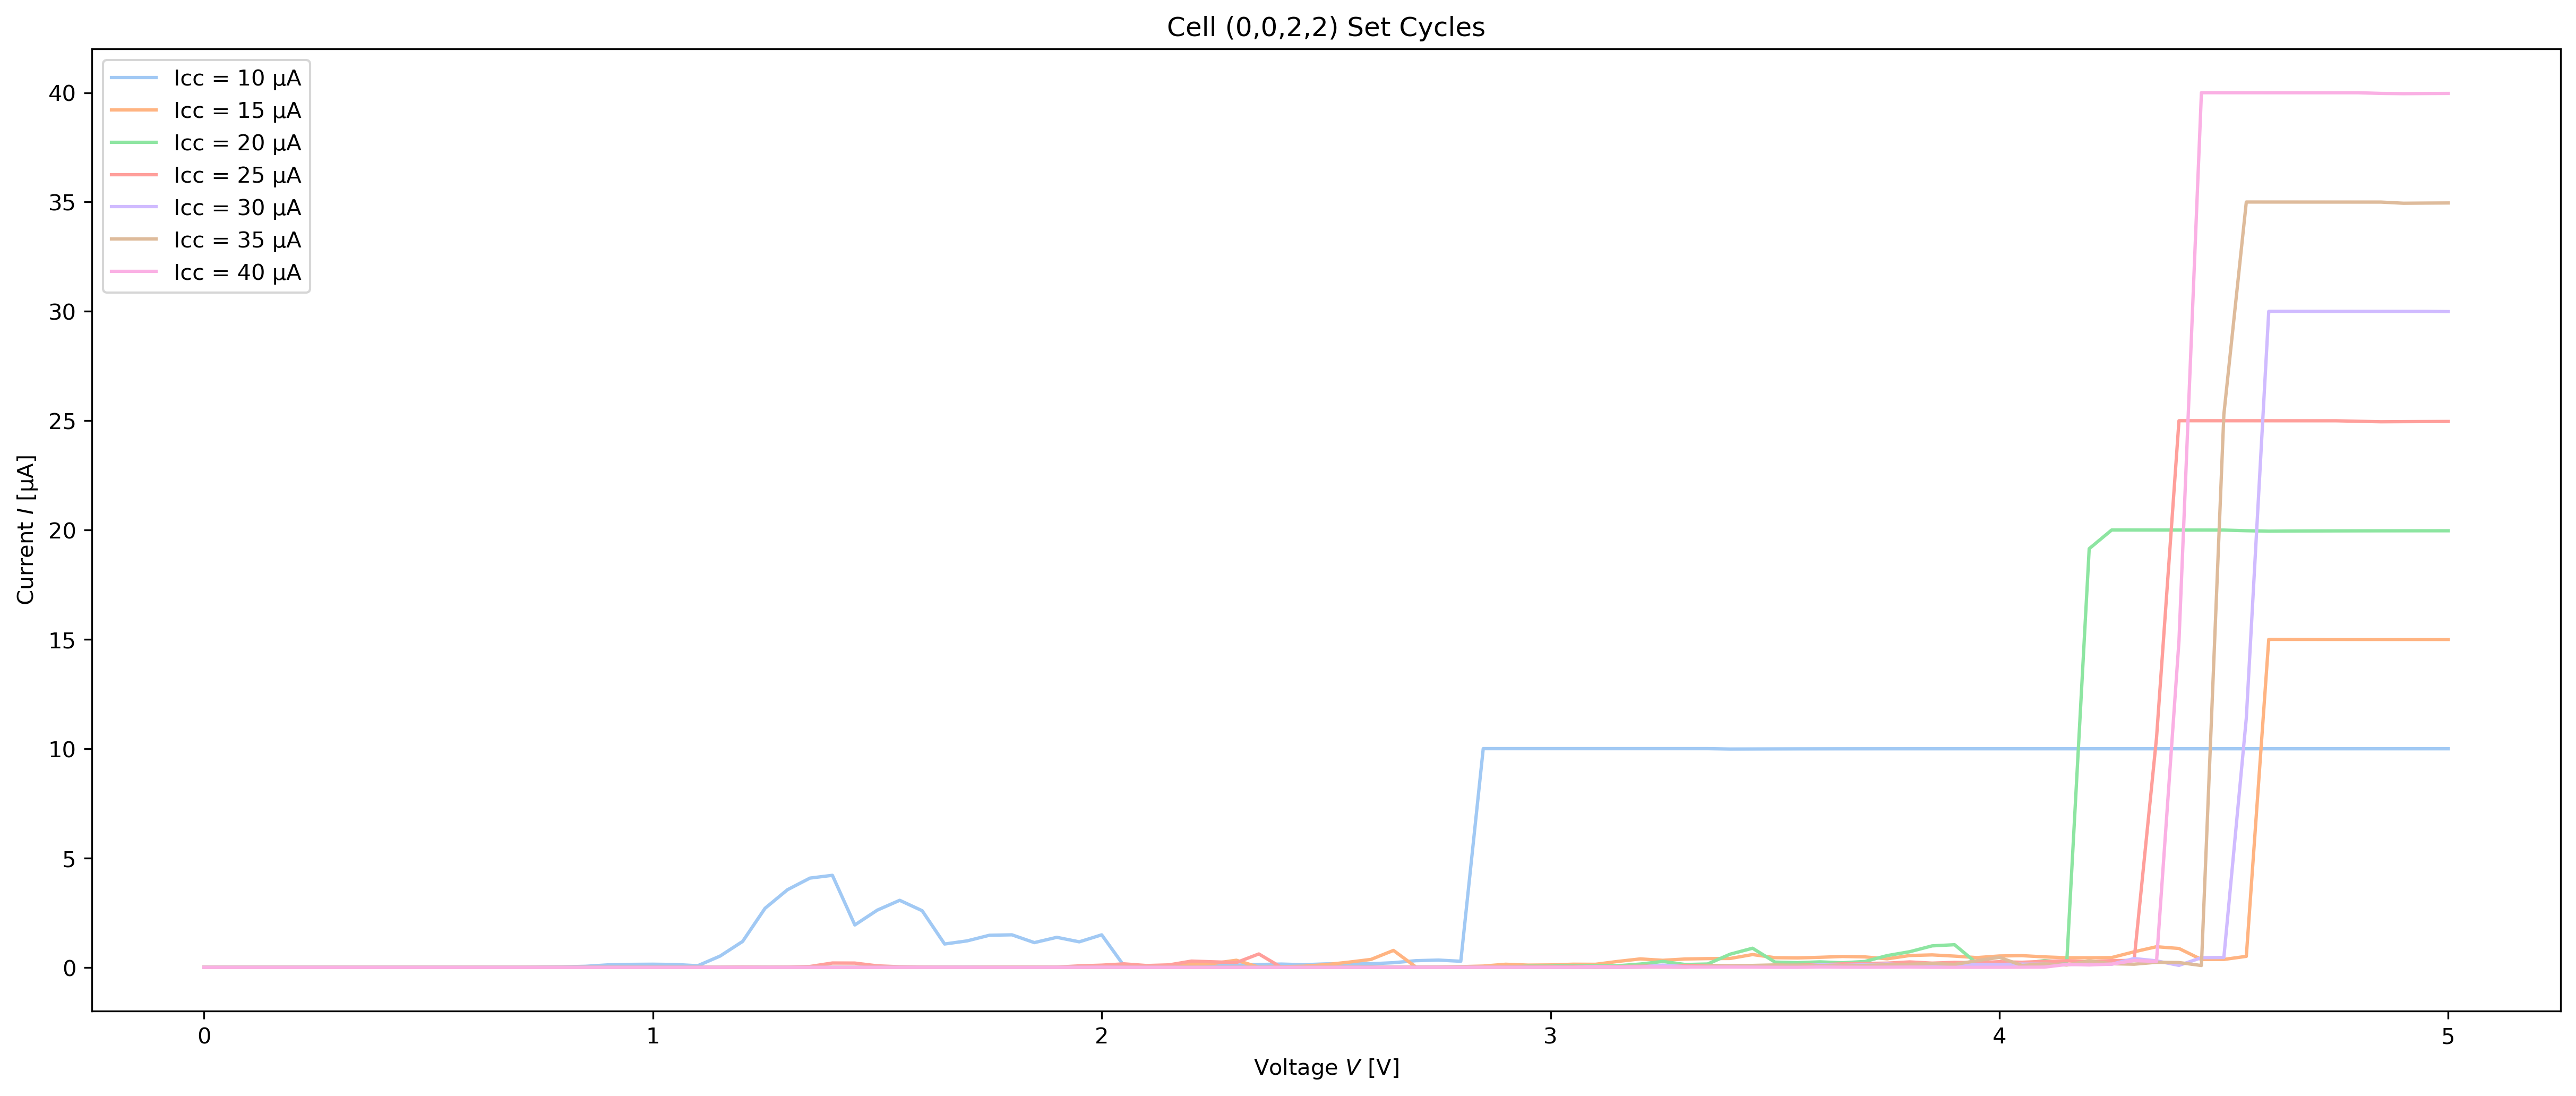

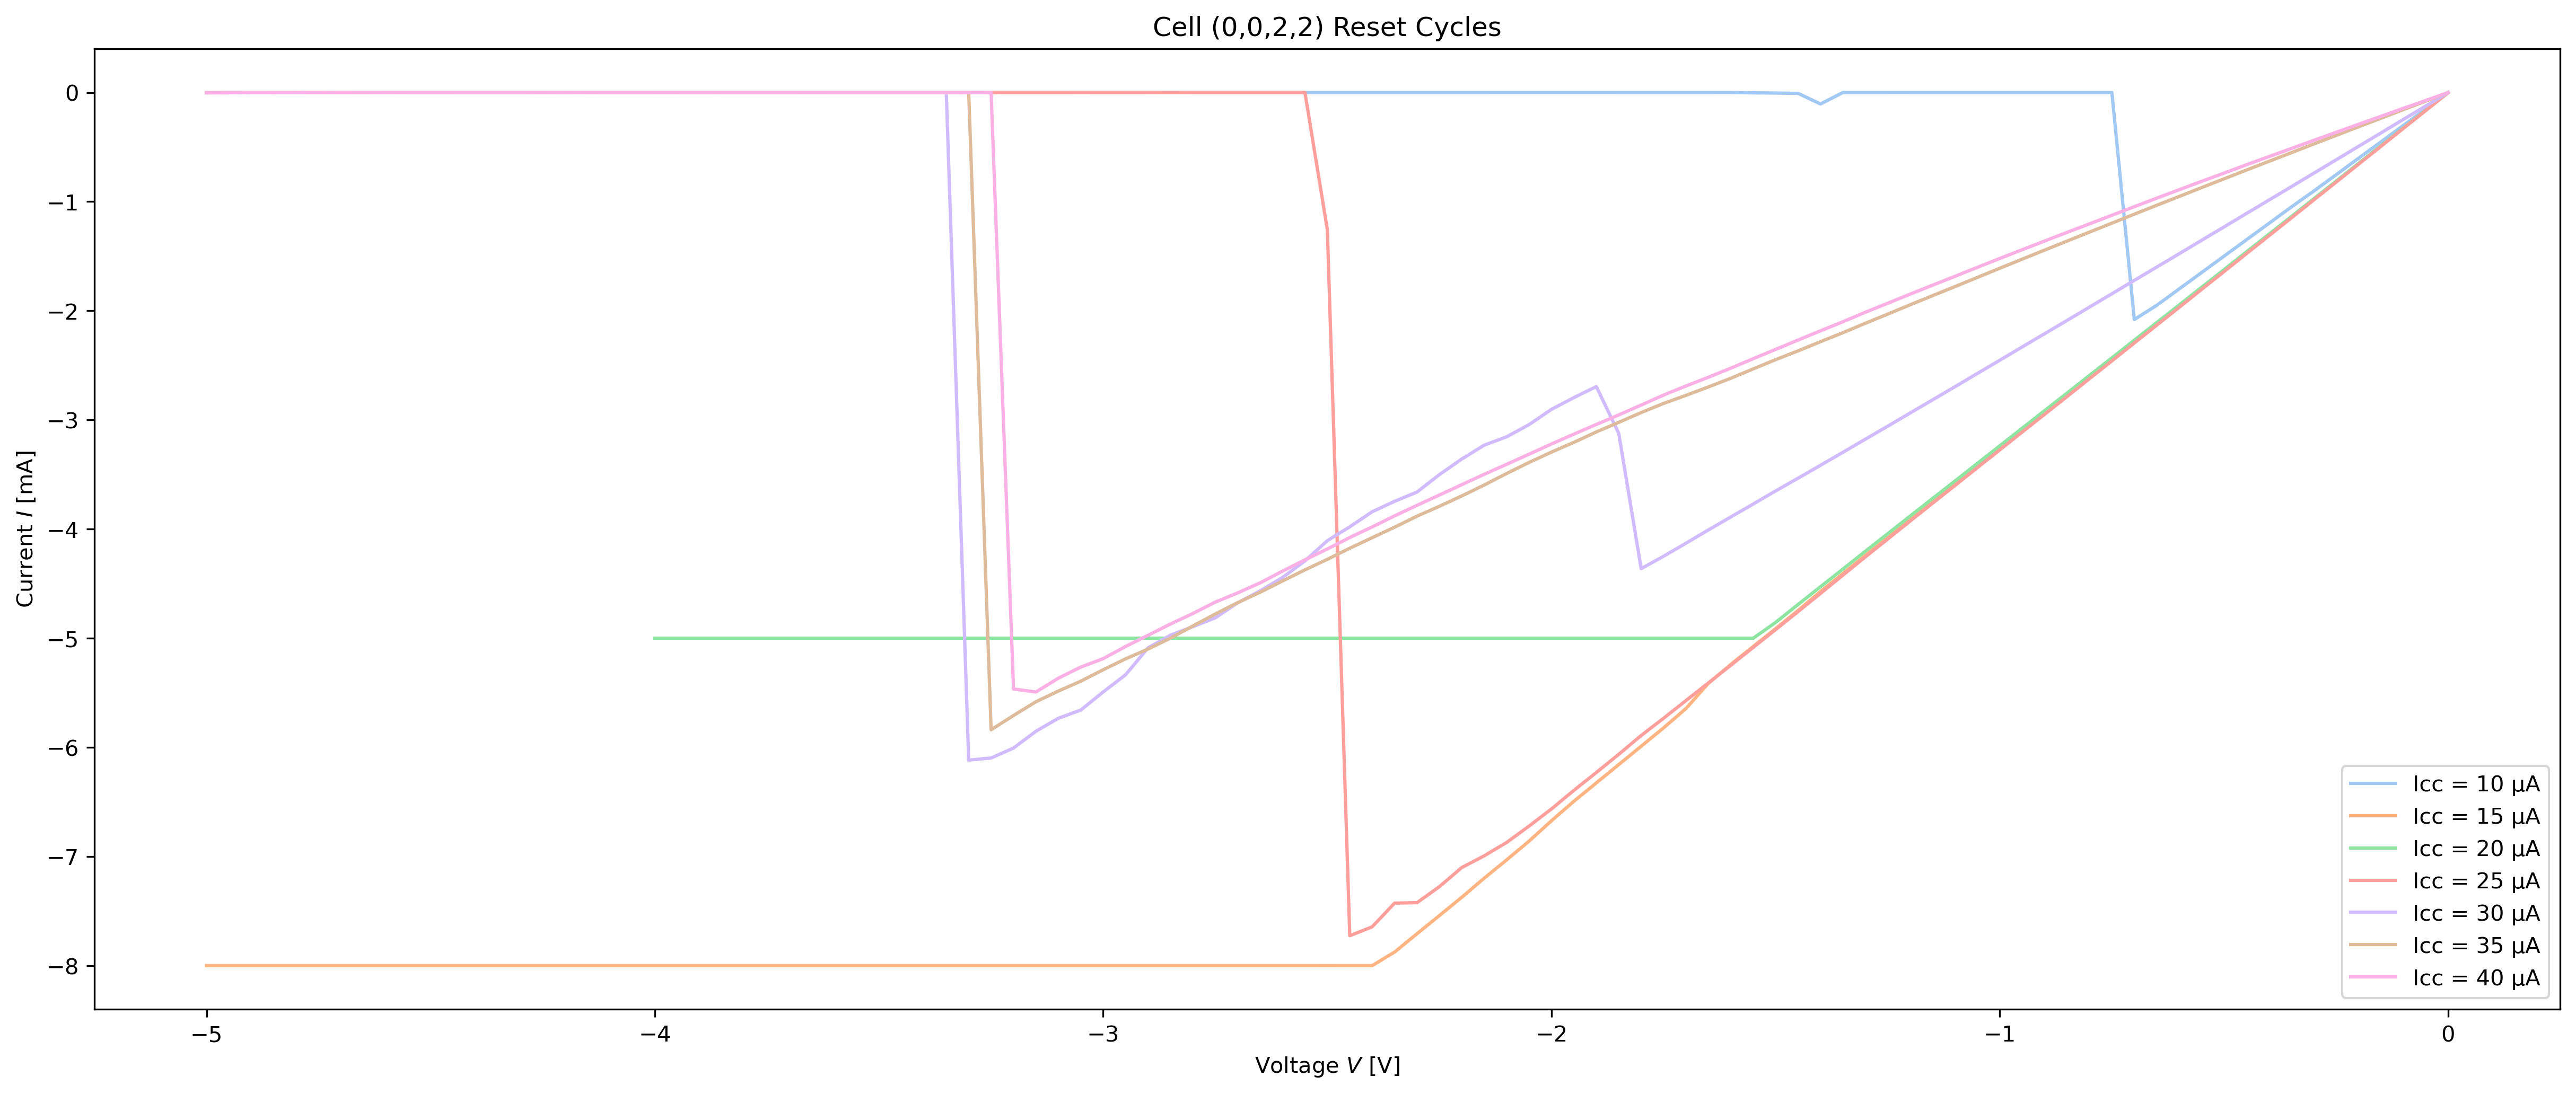

In [20]:
fig = plt.figure(figsize=(20, 8), dpi=300)
fig.patch.set_facecolor('white')

for i, (icc, dfs, dfr) in enumerate(df_list):
    plt.plot(dfs.AV, dfs.AI * 1e6, c=f'C{i}', label=f'Icc = {icc} μA')
    
plt.xlabel('Voltage $V$ [V]')
plt.ylabel('Current $I$ [μA]')
plt.title('Cell (0,0,2,2) Set Cycles')
plt.legend()
plt.savefig(f'{out_dir}/set_plot.png')
plt.show()

############################

fig = plt.figure(figsize=(20, 8), dpi=300)
fig.patch.set_facecolor('white')

for i, (icc, dfs, dfr) in enumerate(df_list):
    plt.plot(dfr.AV, dfr.AI * 1e3, c=f'C{i}', label=f'Icc = {icc} μA')
    
plt.xlabel('Voltage $V$ [V]')
plt.ylabel('Current $I$ [mA]')
plt.title('Cell (0,0,2,2) Reset Cycles')
plt.legend()
plt.savefig(f'{out_dir}/reset_plot.png')
plt.show()

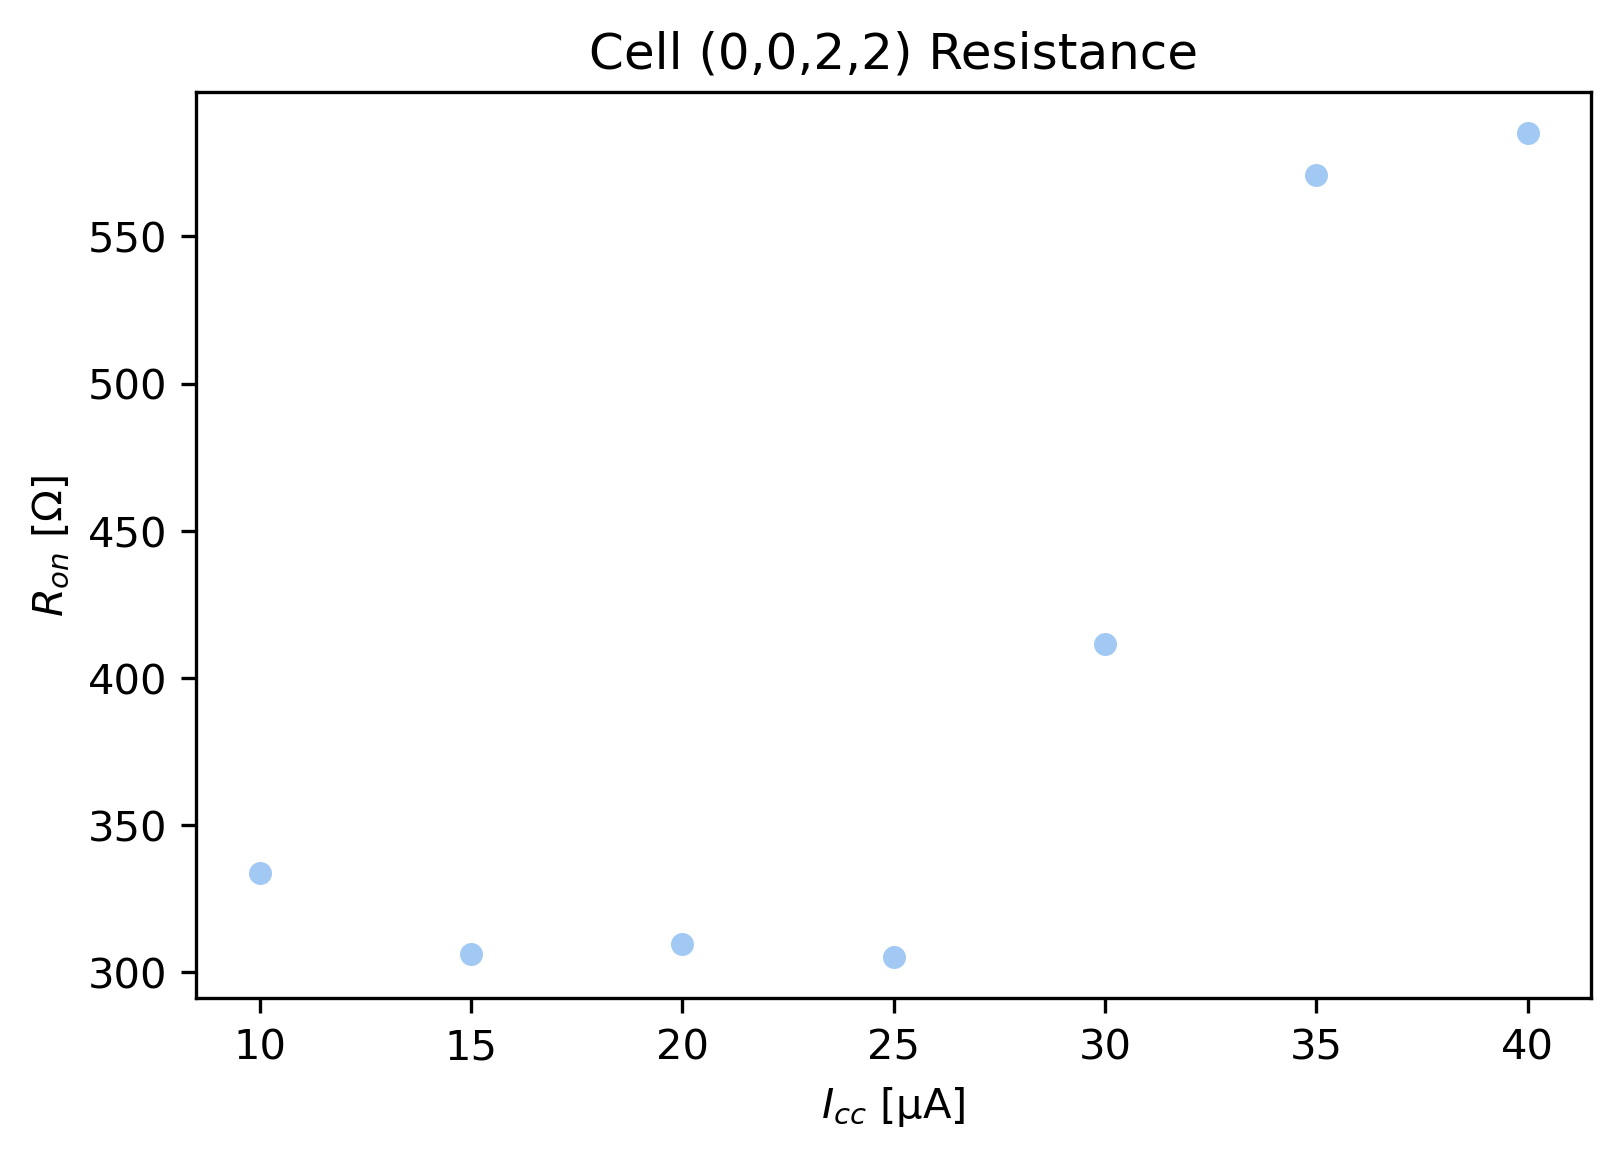

In [24]:
df.to_csv(f'{out_dir}/processed.csv', index=False)

fig = plt.figure(dpi=300)
fig.patch.set_facecolor('white')
sns.scatterplot(data=df, x="Icc", y="R_on")
plt.title("Cell (0,0,2,2) Resistance")
plt.xlabel("$I_{cc}$ [μA]")
plt.ylabel("$R_{on}$ [Ω]")
plt.savefig(f"{out_dir}/r_on_plot.png")
plt.show()